In [1]:
import pysam

In [240]:
def collapse(seq):
    seq = seq.get_reference_positions()
    try:
        j = seq[0]
    except IndexError:
        return []
    segments = []
    segment = [j]
    i = j
    for i in seq[1:]:
        if i == j + 1:
            pass
        else:
            segment.append(j + 1)
            segments.append(segment)
            segment = [i]
        j = i
    segment.append(i + 1)
    segments.append(segment)
    return segments

In [3]:
cells_transcripts = {}

In [4]:
{"cell_barcode" : "count of unique UMIs"}

{'cell_barcode': 'count of unique UMIs'}

In [5]:
import collections

In [6]:
transcripts_counts = collections.Counter({})

In [7]:
transcripts = {}

In [8]:
{"Cell_barcode + UMI_barcode" : "how many sequencing reads"}

{'Cell_barcode + UMI_barcode': 'how many sequencing reads'}

In [16]:
#i.get_reference_sequence()
#i.seq

In [ ]:
ACCGTAC

In [ ]:
53, 54, 55, 56, 57

In [ ]:
ACGTAC

In [84]:
import collections

In [185]:
def record_snp(SNPs, read):
    reference = read.get_reference_sequence()
    positions = read.get_reference_positions()
    sequence = read.seq
    ref_to_loc = {j:i for i, j in read.get_aligned_pairs()}
    for ref, position in zip(reference, positions):
        if ref.upper() != ref:
            wild = ref.upper()
            mutant = sequence[ref_to_loc[position]]
            result = SNPs.setdefault(position, [wild, collections.Counter({})])
            assert result[0] == wild
            result[1][mutant] += 1
            #print(wild, position, sequence[ref_to_loc[position]])

In [244]:
SNPs = {}
# TODO this has to be a tree per reference name
tree = IntervalTree()
differences = collections.Counter({})
with pysam.AlignmentFile("filtered.bam", "rb") as f:
    it = f.fetch()
    for read in it:
        segments = collapse(read)
        for segment in segments:
            tree[segment[0]:segment[1]] = read
        record_snp(SNPs, read)

In [251]:
for location in SNPs.keys():
    SNPs[location].append(len(tree[location]))

In [252]:
SNPs

{65499933: ['A', Counter({'C': 1}), 3],
 65499956: ['A', Counter({'G': 1}), 3],
 65500473: ['A', Counter({'C': 1}), 4],
 65500425: ['T', Counter({'C': 1}), 4],
 65500514: ['T', Counter({'C': 1}), 5],
 65500416: ['T', Counter({'G': 1}), 4],
 65500448: ['G', Counter({'C': 1}), 4],
 65500509: ['C', Counter({'G': 1}), 5],
 65500564: ['A', Counter({'C': 1}), 2],
 65500584: ['A', Counter({'C': 1}), 2],
 65500588: ['A', Counter({'T': 1}), 2],
 65500597: ['T', Counter({'C': 1}), 2],
 65500604: ['A', Counter({'C': 1}), 2],
 65500608: ['A', Counter({'C': 1}), 2],
 65500632: ['T', Counter({'C': 1}), 2],
 65500638: ['T', Counter({'G': 1}), 2],
 65500559: ['A', Counter({'C': 1}), 2],
 65500692: ['C', Counter({'A': 1}), 6],
 65500757: ['T', Counter({'C': 1}), 12],
 65500771: ['C', Counter({'G': 1}), 12],
 65500845: ['G', Counter({'C': 7}), 7],
 65500847: ['G', Counter({'A': 7}), 7],
 65500833: ['C', Counter({'A': 1}), 9]}

In [194]:
from intervaltree import IntervalTree

In [199]:
tree[1:3] = ("CB", "UMI")

In [242]:
tree[3]

set()

In [187]:
SNPs

{65499933: ['A', Counter({'C': 1})],
 65499956: ['A', Counter({'G': 1})],
 65500473: ['A', Counter({'C': 1})],
 65500425: ['T', Counter({'C': 1})],
 65500514: ['T', Counter({'C': 1})],
 65500416: ['T', Counter({'G': 1})],
 65500448: ['G', Counter({'C': 1})],
 65500509: ['C', Counter({'G': 1})],
 65500564: ['A', Counter({'C': 1})],
 65500584: ['A', Counter({'C': 1})],
 65500588: ['A', Counter({'T': 1})],
 65500597: ['T', Counter({'C': 1})],
 65500604: ['A', Counter({'C': 1})],
 65500608: ['A', Counter({'C': 1})],
 65500632: ['T', Counter({'C': 1})],
 65500638: ['T', Counter({'G': 1})],
 65500559: ['A', Counter({'C': 1})],
 65500692: ['C', Counter({'A': 1})],
 65500757: ['T', Counter({'C': 1})],
 65500771: ['C', Counter({'G': 1})],
 65500845: ['G', Counter({'C': 7})],
 65500847: ['G', Counter({'A': 7})],
 65500833: ['C', Counter({'A': 1})]}

In [139]:
len(i.get_reference_sequence())

117

In [140]:
len(i.seq)

138

In [143]:
len(i.get_reference_positions())

117

In [144]:
len(i.positions)

117

In [156]:
reference = read.get_reference_sequence()
positions = read.get_reference_positions()
sequence = read.seq
for ref, position in zip(reference, positions):
    if ref.upper() != ref:
        wild = ref.upper()
        mutant = sequence[ref_to_loc[position]]
        print(wild, position, sequence[ref_to_loc[position]])
        

KeyError: 65499933

In [154]:
reference

'TGtGcGGTAGGCATTGAGgCAGCCAGCGCAGGGgCTTCTGCTGAGGGGGCAGGCGGaGCTTGAGGAaACCGCAGATAAGTTTTTTTCTCTTTGAAAGATAGAGATTAATACAAcTAC'

In [155]:
sequence

'GGTATCAACGCAGAGTGAATGCGAGGTAGGCATTGAGTCAGCCAGCGCAGGGCCTTCTGCTGAGGGGGCAGGCGGGGCTTGAGGATACCGCAGATAAGTTTTTTTCTCTTTGAAAGATAGAGATTAATACAAATACAT'

In [149]:
enumerate(i.seq)

In [148]:
ref_to_loc

{None: 137,
 65499036: 19,
 65499037: 20,
 65499038: 21,
 65499039: 22,
 65499040: 23,
 65499041: 24,
 65499042: 25,
 65499043: 26,
 65499044: 27,
 65499045: 28,
 65499046: 29,
 65499047: 30,
 65499048: 31,
 65499049: 32,
 65499050: 33,
 65499051: 34,
 65499052: 35,
 65499053: 36,
 65499054: 37,
 65499055: 38,
 65499056: 39,
 65499057: 40,
 65499058: 41,
 65499059: 42,
 65499060: 43,
 65499061: 44,
 65499062: 45,
 65499063: 46,
 65499064: 47,
 65499065: 48,
 65499066: 49,
 65499067: 50,
 65499068: 51,
 65499069: 52,
 65499070: 53,
 65499071: 54,
 65499072: 55,
 65499073: 56,
 65499074: 57,
 65499075: 58,
 65499076: 59,
 65499077: 60,
 65499078: 61,
 65499079: 62,
 65499080: 63,
 65499081: 64,
 65499082: 65,
 65499083: 66,
 65499084: 67,
 65499085: 68,
 65499086: 69,
 65499087: 70,
 65499088: 71,
 65499089: 72,
 65499090: 73,
 65499091: 74,
 65499092: 75,
 65499093: 76,
 65499094: 77,
 65499095: 78,
 65499096: 79,
 65499097: 80,
 65499098: 81,
 65499099: 82,
 65499100: 83,
 65499101: 84

In [145]:
dir(i)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'aend',
 'alen',
 'aligned_pairs',
 'bin',
 'blocks',
 'cigar',
 'cigarstring',
 'cigartuples',
 'compare',
 'flag',
 'from_dict',
 'fromstring',
 'get_aligned_pairs',
 'get_blocks',
 'get_cigar_stats',
 'get_forward_qualities',
 'get_forward_sequence',
 'get_overlap',
 'get_reference_positions',
 'get_reference_sequence',
 'get_tag',
 'get_tags',
 'has_tag',
 'header',
 'infer_query_length',
 'infer_read_length',
 'inferred_length',
 'is_duplicate',
 'is_paired',
 'is_proper_pair',
 'is_qcfail',
 'is_read1',
 'is_read2',
 'is_reverse',
 'is_secondary',
 'is_supplementary',
 'is_unmapped',
 'isize',


In [138]:
read.get_reference_positions()

In [137]:
to_print

['GGTATCAACGCAGAGTGAATGCGAGGTAGGCATTGAGTCAGCCAGCGCAGGGCCTTCTGCTGAGGGGGCAGGCGGGGCTTGAGGATACCGCAGATAAGTTTTTTTCTCTTTGAAAGATAGAGATTAATACAAATACAT',
 'TGtGcGGTAGGCATTGAGgCAGCCAGCGCAGGGgCTTCTGCTGAGGGGGCAGGCGGaGCTTGAGGAaACCGCAGATAAGTTTTTTTCTCTTTGAAAGATAGAGATTAATACAAcTAC']

In [102]:
import matplotlib.pyplot as plt

In [103]:
%matplotlib inline

In [113]:
filt_diff = [(i, j) for i, j in differences.items() if i < 0 or i > 2]

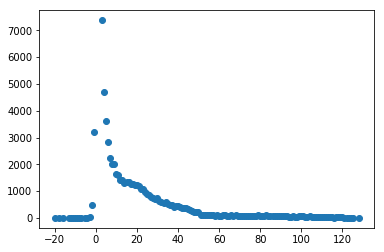

In [114]:
plt.scatter([i for i, j in filt_diff], [j for i, j in filt_diff])

[3607,
 416843,
 48816,
 1231,
 15167,
 1421,
 1591,
 1262,
 7374,
 4688,
 62,
 59,
 1995,
 1997,
 1066,
 2851,
 72,
 25,
 1357,
 740,
 40,
 722,
 1088,
 881,
 1213,
 379,
 359,
 209,
 2237,
 3187,
 39,
 83,
 1626,
 1321,
 1187,
 111,
 42,
 94,
 1355,
 87,
 581,
 430,
 410,
 743,
 1406,
 1271,
 798,
 3,
 87,
 92,
 867,
 92,
 234,
 596,
 105,
 47,
 444,
 113,
 494,
 101,
 226,
 49,
 72,
 85,
 70,
 473,
 973,
 121,
 412,
 97,
 515,
 81,
 60,
 550,
 643,
 68,
 63,
 43,
 102,
 73,
 91,
 61,
 84,
 96,
 66,
 355,
 81,
 263,
 23,
 38,
 116,
 42,
 28,
 69,
 99,
 296,
 20,
 53,
 70,
 324,
 53,
 80,
 35,
 91,
 69,
 69,
 75,
 13,
 68,
 59,
 2,
 78,
 92,
 62,
 56,
 67,
 85,
 481,
 27,
 57,
 16,
 29,
 22,
 18,
 27,
 25,
 2,
 2,
 15,
 4,
 13,
 3,
 19,
 3,
 2,
 4,
 1,
 4,
 2,
 4,
 1,
 1]

In [9]:
with pysam.AlignmentFile("MALAT1.bam", "rb") as f:
    it = f.fetch()
    for i in it:
        t = i.tags
        _, molecular_barcode = t[-1]
        #print(i.tags)
        _, cell_barcode = i.tags[-2]
        #print(molecular_barcode)
        #print(cell_barcode)
        transcripts_counts[(cell_barcode, molecular_barcode)] += 1
        try:
            transcripts[(cell_barcode, molecular_barcode)].append(i.seq)
        except:
            transcripts[(cell_barcode, molecular_barcode)] = [i.seq]

In [49]:
with pysam.AlignmentFile("MALAT1.bam", "rb") as f:
    with pysam.AlignmentFile("filtered2.bam", "wb", template=f) as g:
        it = f.fetch()
        for i in it:
            t = i.tags
            _, molecular_barcode = t[-1]
            _, cell_barcode = i.tags[-2]
            
            cond = (cell_barcode, molecular_barcode) == ('CAGTTCGCTTTG', 'ATGTAAAT')
            
            if cond:
                g.write(i)
            
            #transcripts_counts[(cell_barcode, molecular_barcode)] += 1
            #try:
            #    transcripts[(cell_barcode, molecular_barcode)].append(i.seq)
            #except:
            #transcripts[(cell_barcode, molecular_barcode)] = [i.seq]

In [ ]:
import pysam
f = pysam.AlignmentFile("correct_result.bam")
it = f.fetch()
result = pysam.AlignmentFile("MALAT1.bam", "wb", template=f)
for i in it:
    t = i.tags
    _, gene = t[2]
    if gene == "MALAT1":
        result.write(i)
result.close()

In [ ]:
('GTCTTCCGAGAA', 'AGGGTGGC')
('TTCTCGGAAGAC', 'GCCACCCT')

In [10]:
#unique transcript: "CTCCGTC"

In [11]:
#"CTCCGTC", "CTCCGTC", "CTCGGTC", "CTCCGTC", "CTCCGTC" "CTCCGTC"

In [46]:
transcripts_sorted = sorted([(len(j), i) for i, j in transcripts.items()], reverse=True)

In [48]:
transcripts_sorted[:20]

[(33, ('TAGGGTGTCATT', 'GGGGGGGG')),
 (26, ('GTCTTCCGAGAA', 'AGGGTGGC')),
 (25, ('GCGGAATTCCCC', 'CATTATAT')),
 (24, ('TAGGGTGTCATT', 'GGGGGGCG')),
 (23, ('TGCGTAGTAGTT', 'GGGGGGGG')),
 (23, ('TAGGGTGTCATT', 'CCGGGGGG')),
 (23, ('GTTGCCGGTCGT', 'CTTCTAGT')),
 (23, ('AAACATCTGATA', 'GGGAGGGG')),
 (22, ('CAGTTCGCTTTG', 'ATGTAAAT')),
 (21, ('TACTACACACTT', 'CGGCCCGG')),
 (21, ('GTTTTGTGAAGG', 'AGGGTAGG')),
 (21, ('ATCACCACTATC', 'CGCCCTCA')),
 (20, ('TGGGCGCCGTCT', 'ACGCGCGC')),
 (20, ('CCCTGTCAGCTC', 'GGTCGGCG')),
 (20, ('CATCACGTCCGA', 'ATGACTAG')),
 (20, ('ATCGCGGCTTAA', 'GCGCTAAG')),
 (20, ('ATCATTATAATT', 'GACTCGGA')),
 (20, ('AGAAGAGCAGTG', 'GACCAGAC')),
 (20, ('AATGGTATTCTA', 'GTAATTTG')),
 (19, ('TTTAGAAACTAG', 'GCTAGGGG'))]

In [50]:
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

(array([  1.51856000e+05,   2.42480000e+04,   7.35700000e+03,
          9.91000000e+02,   2.64000000e+02,   2.80000000e+01,
          8.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  1. ,   4.5,   8. ,  11.5,  15. ,  18.5,  22. ,  25.5,  29. ,
         32.5,  36. ]),
 <a list of 10 Patch objects>)

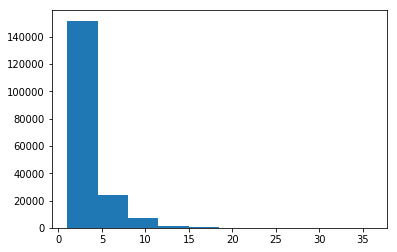

In [53]:
plt.hist([j for i, j in transcripts_counts.items()])

In [58]:
sorted([j for i, j in transcripts_counts.items()], reverse=True)

[36,
 29,
 26,
 25,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,


In [ ]:
cell + umi

In [ ]:
f = file.open()
do something with f
f.close()

In [ ]:
with file.open as f:
    do something